# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | tabou
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | johnson lane
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | fort mcmurray
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set

Processing Record 39 of Set 4 | thunder bay
Processing Record 40 of Set 4 | erenhot
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | gonabad
Processing Record 43 of Set 4 | nizhnesortymskiy
Processing Record 44 of Set 4 | al kharj
Processing Record 45 of Set 4 | castillos
Processing Record 46 of Set 4 | grand falls-windsor
Processing Record 47 of Set 4 | mogadishu
Processing Record 48 of Set 4 | rio grande
Processing Record 49 of Set 4 | howard springs
Processing Record 0 of Set 5 | ketchikan
Processing Record 1 of Set 5 | island harbour
Processing Record 2 of Set 5 | ta`u
Processing Record 3 of Set 5 | boguchany
Processing Record 4 of Set 5 | rossosh'
Processing Record 5 of Set 5 | shelton
Processing Record 6 of Set 5 | istgah-e rah ahan-e garmsar
Processing Record 7 of Set 5 | utrik
Processing Record 8 of Set 5 | san antonio de pale
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | tazovsky
Processing Record 11 of Set 5 | ascension
Pro

Processing Record 28 of Set 8 | witu
Processing Record 29 of Set 8 | tadine
Processing Record 30 of Set 8 | mountain home
Processing Record 31 of Set 8 | mezhdurechenskiy
Processing Record 32 of Set 8 | zemio
Processing Record 33 of Set 8 | along
Processing Record 34 of Set 8 | mokhsogollokh
Processing Record 35 of Set 8 | namibe
Processing Record 36 of Set 8 | toccoa
Processing Record 37 of Set 8 | elliot lake
Processing Record 38 of Set 8 | betio village
Processing Record 39 of Set 8 | strezhevoy
Processing Record 40 of Set 8 | viedma
Processing Record 41 of Set 8 | notodden
Processing Record 42 of Set 8 | olyokminsk
Processing Record 43 of Set 8 | karmaskaly
Processing Record 44 of Set 8 | camapua
Processing Record 45 of Set 8 | hirara
Processing Record 46 of Set 8 | ballito
Processing Record 47 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 48 of Set 8 | chunskiy
Processing Record 49 of Set 8 | mont-dore
Processing Record 0 of Set 9 | portland
Processing

Processing Record 16 of Set 12 | zangguy
City not found. Skipping...
Processing Record 17 of Set 12 | vila do maio
Processing Record 18 of Set 12 | kasongo-lunda
Processing Record 19 of Set 12 | mount isa
Processing Record 20 of Set 12 | remire-montjoly
Processing Record 21 of Set 12 | wenzhou
Processing Record 22 of Set 12 | pangody
Processing Record 23 of Set 12 | luorong
Processing Record 24 of Set 12 | mugia
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,25.03,78,75,7.72,CK,1701229096
1,bilibino,68.0546,166.4372,-34.30,100,95,0.84,RU,1701229216
2,tabou,4.4230,-7.3528,25.46,86,82,1.44,CI,1701229229
3,constantia,44.1833,28.6500,6.38,79,95,10.64,RO,1701229281
4,adamstown,-25.0660,-130.1015,22.76,88,4,6.31,PN,1701229507


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,25.03,78,75,7.72,CK,1701229096
1,bilibino,68.0546,166.4372,-34.30,100,95,0.84,RU,1701229216
2,tabou,4.4230,-7.3528,25.46,86,82,1.44,CI,1701229229
3,constantia,44.1833,28.6500,6.38,79,95,10.64,RO,1701229281
4,adamstown,-25.0660,-130.1015,22.76,88,4,6.31,PN,1701229507


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

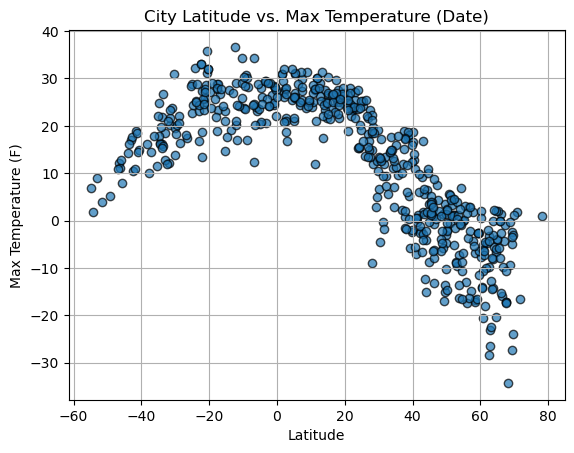

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

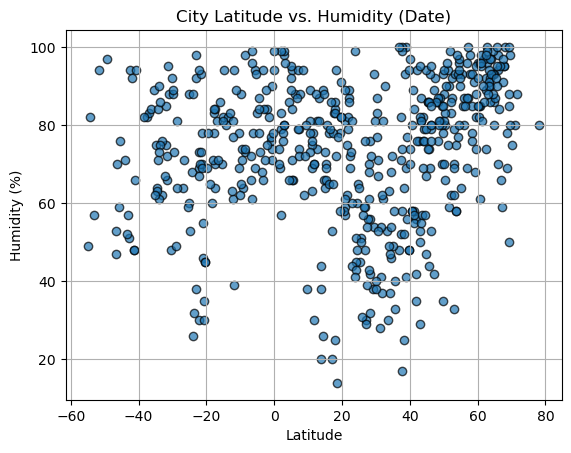

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

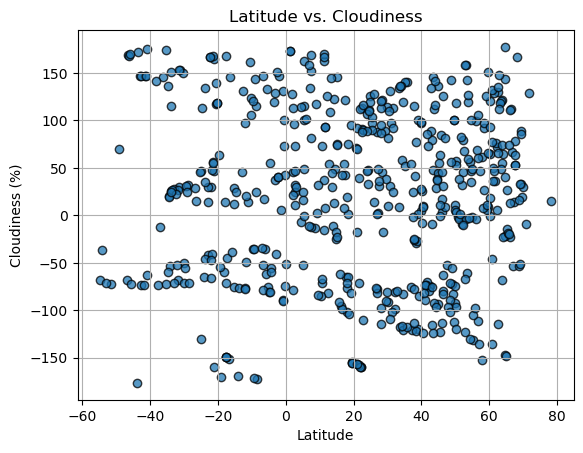

In [11]:
# Assuming your DataFrame has columns 'Latitude' and 'Cloudiness', replace them with your actual column names
latitude_data = city_data_df['Lat']
cloudiness_data = city_data_df['Lng']

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(latitude_data, cloudiness_data, marker='o', edgecolors='black', alpha=0.75)

# Incorporate other graph properties (labels, title, grid, etc.)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

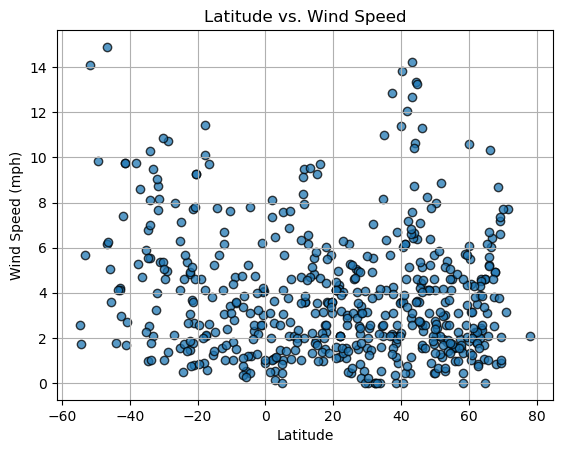

In [12]:
# Assuming your DataFrame has columns 'Latitude' and 'Wind Speed', replace them with your actual column names
latitude_data = city_data_df['Lat']
wind_speed_data = city_data_df['Wind Speed']

# Build the scatter plot for latitude vs. wind speed
plt.scatter(latitude_data, wind_speed_data, marker='o', edgecolors='black', alpha=0.75)

# Incorporate other graph properties (labels, title, grid, etc.)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_linear_regression_plot(data, x_variable, y_variable, title="Linear Regression Plot", xlabel="X-axis", ylabel="Y-axis"):
    """
    Create a linear regression plot using seaborn and matplotlib.

    :param data: DataFrame containing the data
    :param x_variable: The name of the column to be used as the x-variable
    :param y_variable: The name of the column to be used as the y-variable
    :param title: The title of the plot (default is 'Linear Regression Plot')
    :param xlabel: The label for the x-axis (default is 'X-axis')
    :param ylabel: The label for the y-axis (default is 'Y-axis')
    """
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_variable, y=y_variable, data=data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

    # Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,-34.30,100,95,0.84,RU,1701229216
2,tabou,4.4230,-7.3528,25.46,86,82,1.44,CI,1701229229
3,constantia,44.1833,28.6500,6.38,79,95,10.64,RO,1701229281
5,ribeira grande,38.5167,-28.7000,17.65,93,100,1.79,PT,1701229171
7,tiksi,71.6872,128.8694,-16.63,88,100,7.71,RU,1701229140


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,25.03,78,75,7.72,CK,1701229096
4,adamstown,-25.0660,-130.1015,22.76,88,4,6.31,PN,1701229507
6,grytviken,-54.2811,-36.5092,1.71,82,94,1.71,GS,1701229508
9,richards bay,-28.7830,32.0377,22.08,81,100,10.73,ZA,1701229509
10,waitangi,-43.9535,-176.5597,14.34,71,100,1.79,NZ,1701229149


In [18]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):  
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}\n")
    print("The r-value is:", r_value)
    
    plt.figure(figsize=(7, 7))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f'Latitude vs. {y_label} ' + time.strftime("%Y-%m-%d"),fontweight="bold")
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8800871413630595


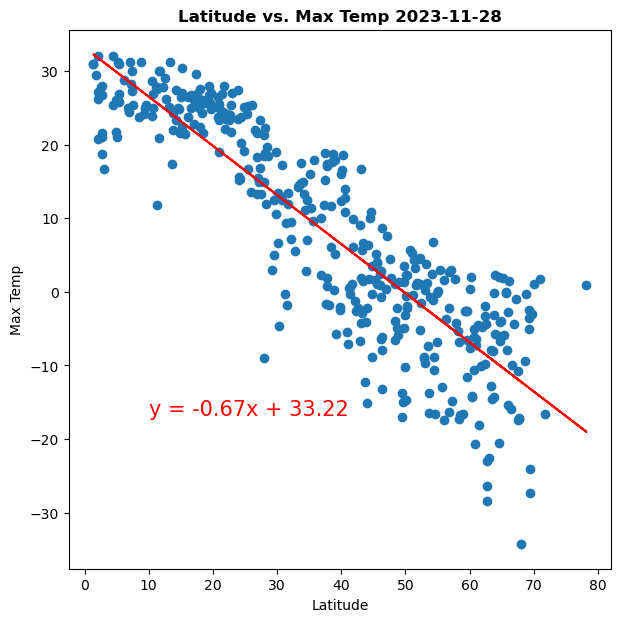

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Max Temp',(10,-20))

The r-value is: 0.666646356539409


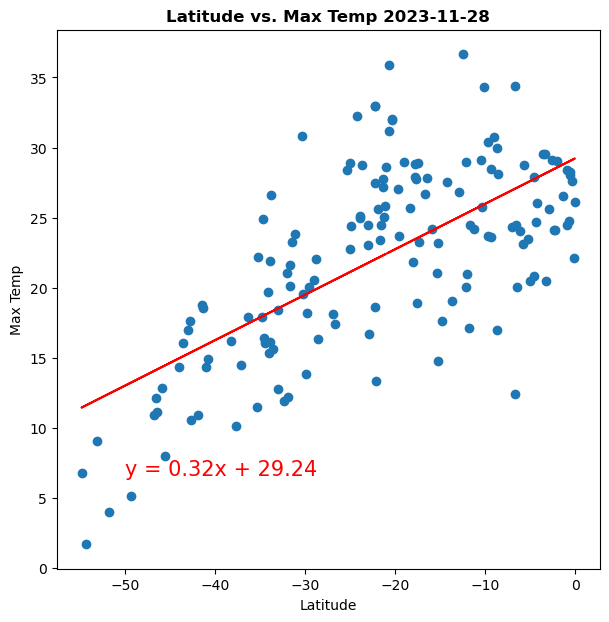

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Max Temp',(-50,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3000771795304724


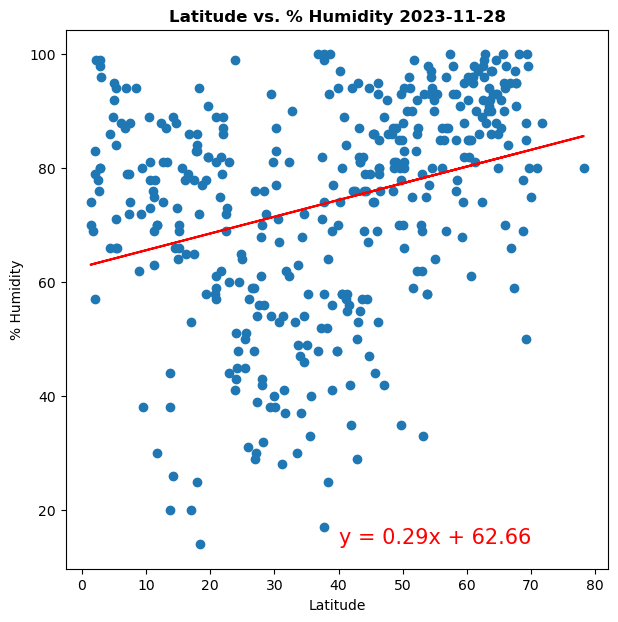

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],'% Humidity',(40,10))

The r-value is: 0.1964793553585994


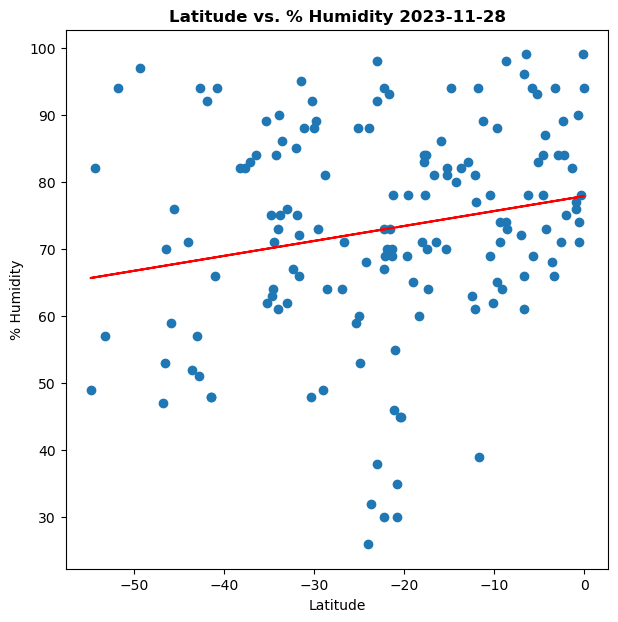

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],'% Humidity',(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2347973642077134


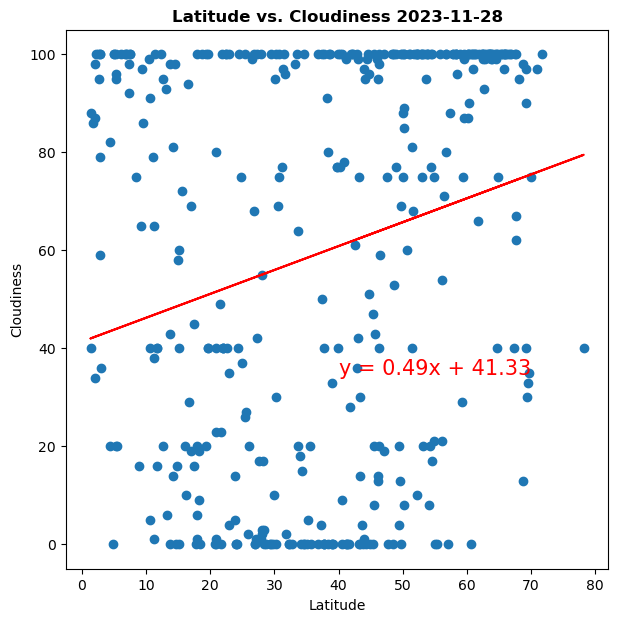

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness', (40,30))

The r-value is: 0.06961095104636426


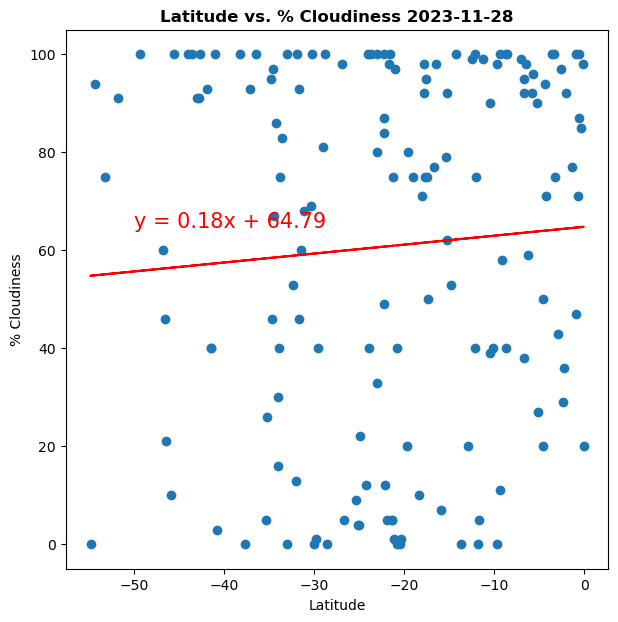

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, '% Cloudiness',(-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04061411794940475


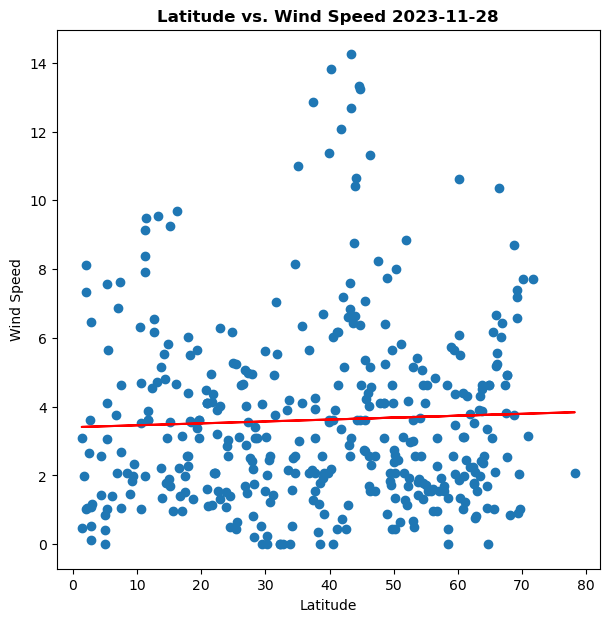

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],'Wind Speed',(40,35))

The r-value is: -0.372040454336891


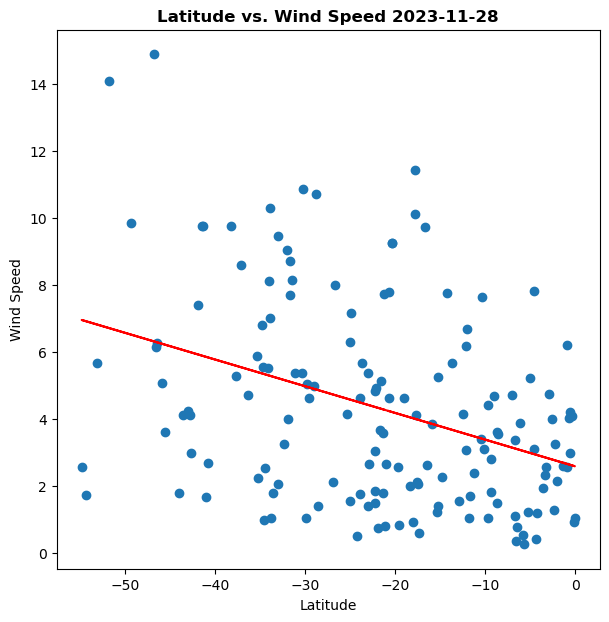

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],'Wind Speed',(-50,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
Positive correlation seen with latitude and Max Temp, Cloudines, and Wind Speed while low correlation seen with Humidity.